Objective:


The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

About the Data:


The data contains industry trends, investment insights and individual company information. There are 48 columns/features. Some of the features are:

agefirstfunding_year – quantitative

agelastfunding_year – quantitative

relationships – quantitative

funding_rounds – quantitative

fundingtotalusd – quantitative

milestones – quantitative

agefirstmilestone_year – quantitative

agelastmilestone_year – quantitative

state – categorical

industry_type – categorical

has_VC – categorical

has_angel – categorical

has_roundA – categorical

has_roundB – categorical

has_roundC – categorical

has_roundD – categorical

avg_participants – quantitative

is_top500 – categorical

status(acquired/closed) – categorical 

(the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed)

DATESET GOTTEN FROM KAGGLE

In [ ]:
!pip install git+git://github.com/geopandas/geopandas.git
import numpy as np
import pandas as pd
import seaborn as sn
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set({"figure.figsize": (15,10)})

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-lvvtd4uo
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-lvvtd4uo


In [ ]:
#loading the dataset and ignoring warnings from lines not formatted well.
startup_data= pd.read_csv('startup_data.csv', error_bad_lines=False)

#turning our dataset into a dataframe
df = pd.DataFrame(startup_data)

#Viewing our dataset
df.head(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
df.tail(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,1/1/2003,NaN,2/13/2006,2/13/2006,3.1205,3.1205,4.0027,4.0027,4,1,20000000,1,CA,1,0,0,0,0,security,0,0,0,0,0,0,0,0,0,1,c:26702,0,0,0,1,0,0,3.0000,1,acquired


In [ ]:
#having a holistic view of all columns
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [ ]:
#chacking if there are duplicates
df.duplicated().any()

False

In [ ]:
#viewing our number of data size
df.shape

(923, 49)

In [ ]:
#duplicating our dataset befor deleting redundant data
start_up = df
start_up.head(3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.75,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.00,1,acquired


In [ ]:
#deleting redundant column 
to_drop = ["Unnamed: 0", "zip_code", "city","Unnamed: 6","name","labels", "state_code.1", "object_id"]
for item in to_drop:
  start_up.drop(columns=item, axis=1, inplace=True)

In [ ]:
#replacing the binary data to YES and NO to aid visualization
start_up["status"].replace("acquired","succeed", inplace=True)
start_up["status"].replace("closed", "fail", inplace=True)

In [ ]:
#viewing our new dataframe
start_up.head(3)

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,c:6669,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,succeed
1,CA,37.238916,-121.973718,c:16283,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,succeed
2,CA,32.901049,-117.192656,c:65620,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1,succeed


In [ ]:
#converting our data column to datetime format
for i in ['founded_at', 'first_funding_at', 'last_funding_at', "closed_at"]:
    start_up[i] = pd.to_datetime(start_up[i])

In [ ]:
#fishing out columns with missing data
start_up.isna().sum()

state_code                    0
latitude                      0
longitude                     0
id                            0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_other

In [ ]:
#checking frequency of our dataset
start_up.describe(include=[np.object]).T

,count,unique,top,freq
state_code,923,35,CA,488
id,923,922,c:28482,2
category_code,923,35,software,153
status,923,2,succeed,597


In [ ]:
#removing duplicate ids as they are supposed to be unigue
start_up.drop_duplicates(subset='id', keep="first", inplace=True)

In [ ]:
#viewing to see our new dataset
start_up.describe(include=[np.object]).T

,count,unique,top,freq
state_code,922,35,CA,487
id,922,922,c:16973,1
category_code,922,35,software,153
status,922,2,succeed,596


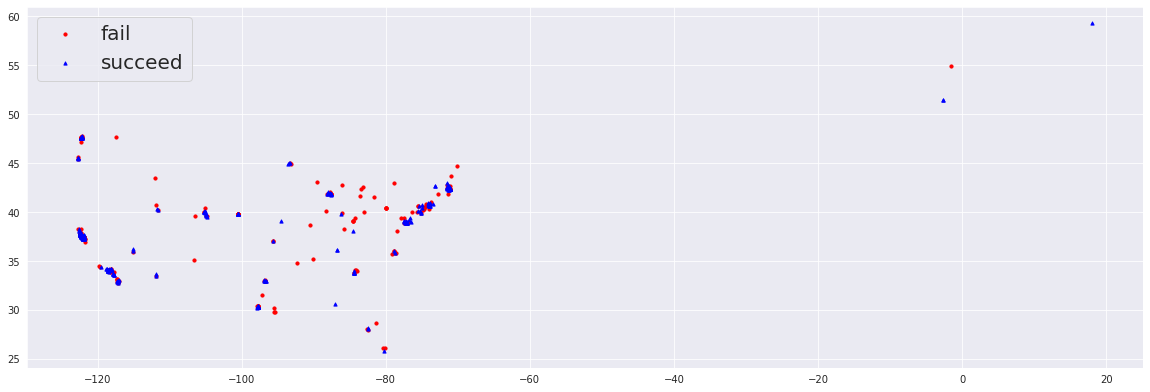

In [ ]:
# Visualising the location of acquired and closed startups
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geometry[:3]
geo_df = gpd.GeoDataFrame(df,
                          crs=crs,
                          geometry=geometry)
fig,ax = plt.subplots(figsize = (20,20))
geo_df[geo_df['status'] == 'fail'].plot(ax = ax, markersize = 10, color = 'red', marker = 'o', label = 'fail')
geo_df[geo_df['status'] == 'succeed'].plot(ax = ax, markersize = 10, color = 'blue', marker = '^', label = 'succeed')
plt.legend(prop = {'size':20})


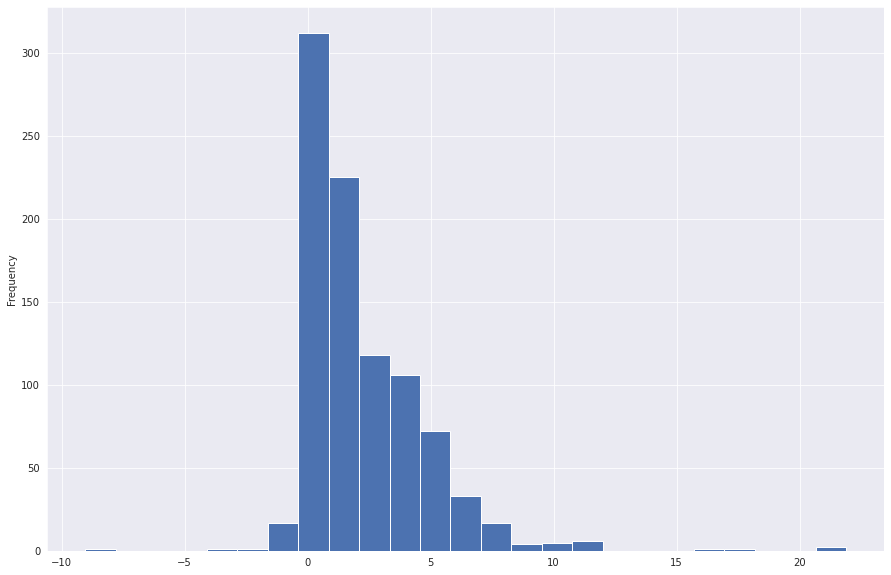

In [ ]:
#most startups get funded within their first five years
start_up["age_first_funding_year"].plot.hist(bins=25);  

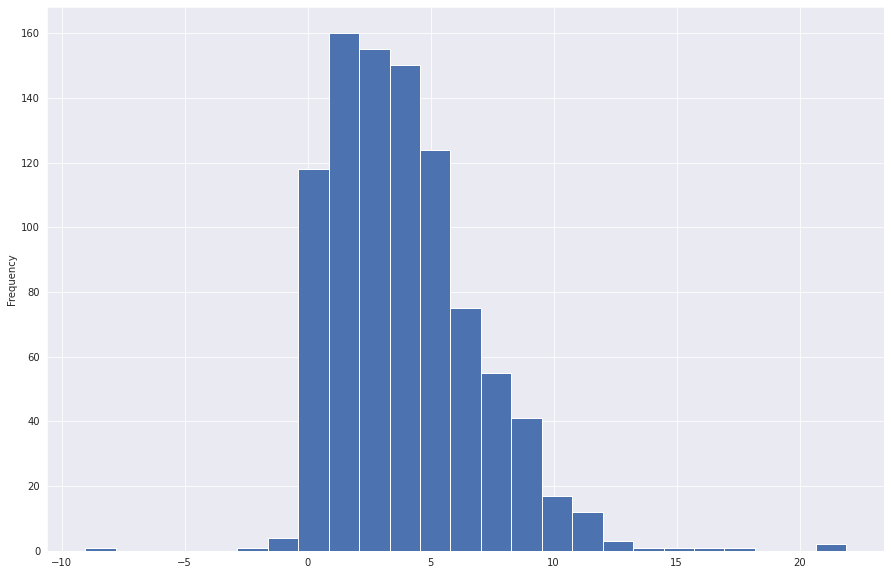

In [ ]:
#fundings are usually come in the first five years & almost non-existent after 10 years
start_up["age_last_funding_year"].plot.hist(bins=25);   

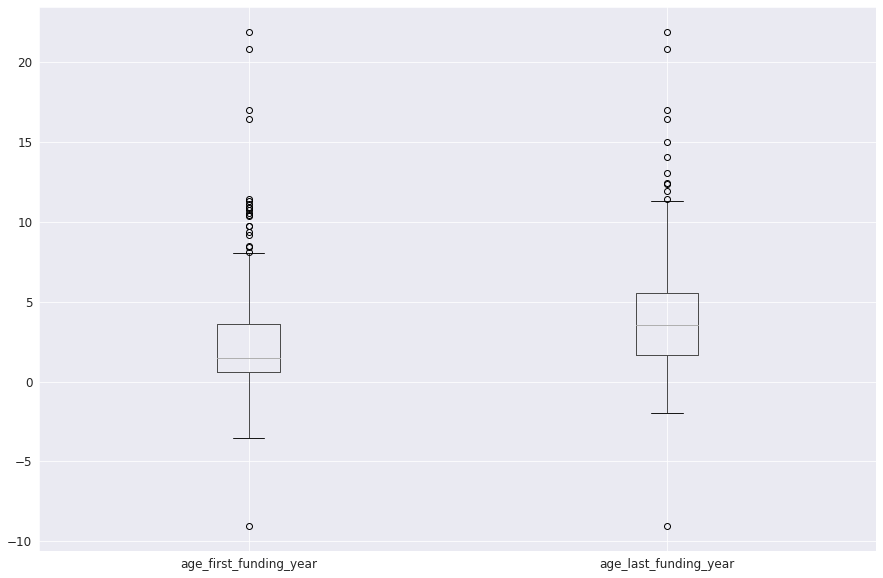

In [ ]:
#looking for outliers
start_up.boxplot(column=["age_first_funding_year", "age_last_funding_year"], fontsize="large"); #outliers show that is corrupted

In [ ]:
#removing outliers
check_df= start_up[(start_up['founded_at']> start_up['closed_at'])]
check_df.head(5)

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry
73,CA,37.779026,-122.401840,c:170,2003-01-01,2001-02-01,2004-09-01,2012-05-01,1.6685,9.3370,7.3808,10.4740,17,4,40400000,3,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1.6667,1,succeed,POINT (-122.40184 37.77903)
88,CA,37.388869,-122.072353,c:280611,2013-01-01,2005-01-01,2013-11-19,2013-11-19,0.8822,0.8822,NaN,NaN,7,1,12000000,0,1,0,0,0,0,ecommerce,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,9.0000,1,fail,POINT (-122.07235 37.38887)
558,NY,40.743662,-73.984268,c:2245,2013-04-16,2009-05-04,2004-04-01,2004-04-01,-9.0466,-9.0466,-6.0466,-3.8822,6,1,100000,2,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0000,0,fail,POINT (-73.98427 40.74366)


In [ ]:
start_up.drop(index=[558,88,73], inplace=True, axis=0)
start_up.head(5)

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry
0,CA,42.358880,-71.056820,c:6669,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,succeed,POINT (-71.05682 42.35888)
1,CA,37.238916,-121.973718,c:16283,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,succeed,POINT (-121.97372 37.23892)
2,CA,32.901049,-117.192656,c:65620,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,succeed,POINT (-117.19266 32.90105)
3,CA,37.320309,-122.050040,c:42668,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,succeed,POINT (-122.05004 37.32031)
4,CA,37.779281,-122.419236,c:65806,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,fail,POINT (-122.41924 37.77928)


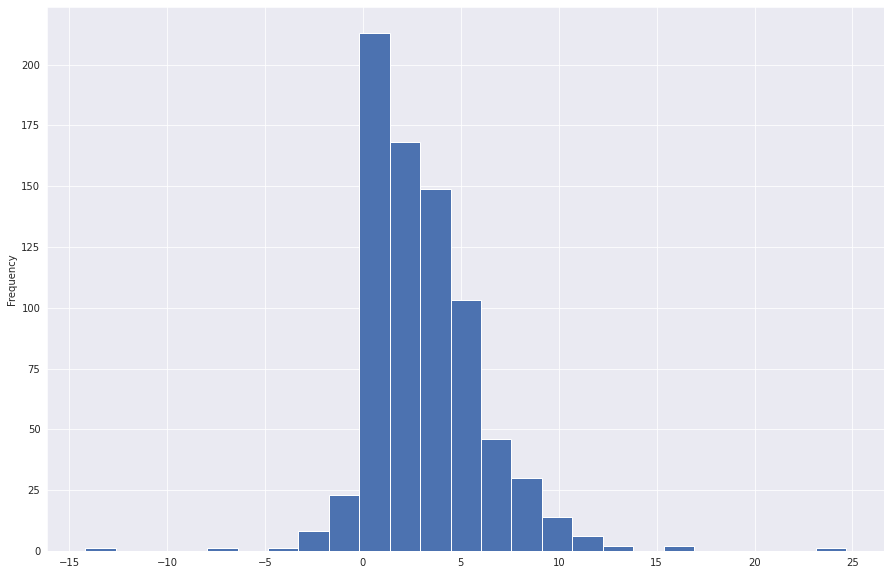

In [ ]:
#shows that most startups hit their first milestone in their first five years and prior compared to other years
start_up.age_first_milestone_year.plot.hist(bins=25);

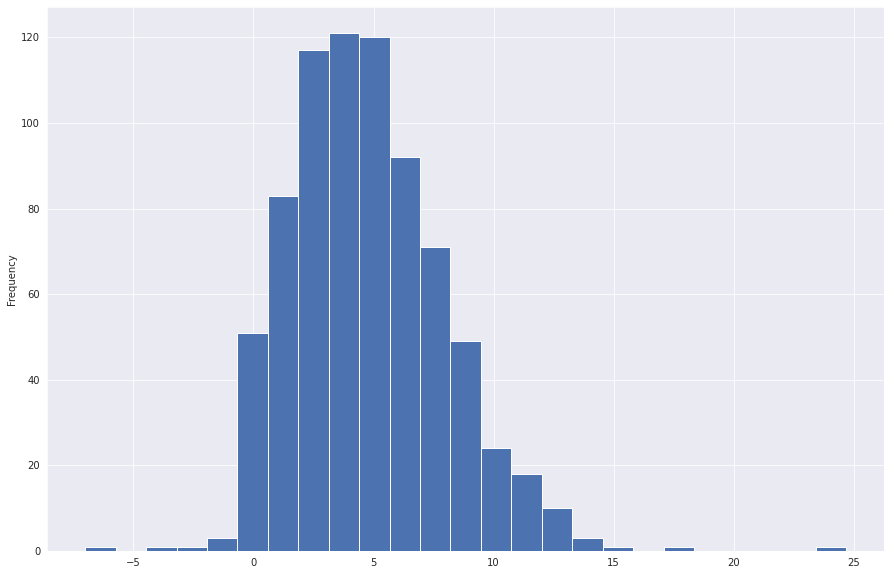

In [ ]:
#shows that startups have the most milestones in their first ten years, after which there's a steady decline
start_up.age_last_milestone_year.plot.hist(bins=25);

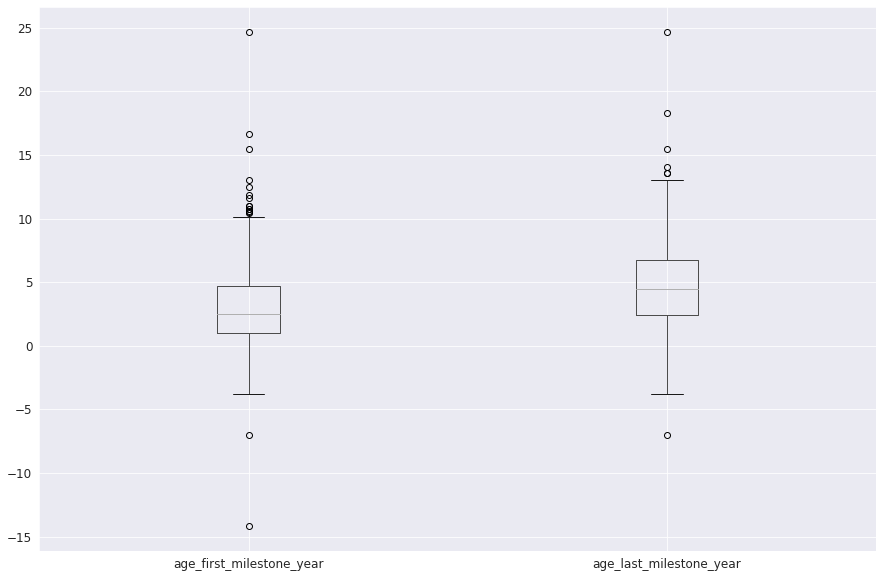

In [ ]:
#checking for outliers - the negative values either show the data is corrupted or that startups hit milestones before their founding year
start_up.boxplot(column=["age_first_milestone_year", "age_last_milestone_year"], fontsize="large");

In [ ]:
check_df2= start_up[(start_up['age_first_milestone_year'] < 0)]
check_df2.head(3)

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry
11,CA,37.452992,-122.185098,c:4829,2006-01-01,2011-12-02,2007-02-01,2011-05-03,1.0849,5.3370,-0.6164,4.6082,8,5,10400000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1.75,1,fail,POINT (-122.18510 37.45299)
17,CA,37.590339,-122.341715,c:107,2000-07-01,NaT,2005-02-01,2007-09-01,4.5918,7.1726,-0.4986,12.6795,7,4,25000000,3,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,3.50,1,succeed,POINT (-122.34171 37.59034)
60,MA,42.546483,-71.173667,c:35157,1999-12-01,2011-11-11,2002-09-12,2010-11-10,2.7836,10.9507,-1.9151,-1.9151,10,3,19009671,1,0,0,1,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2.00,1,fail,POINT (-71.17367 42.54648)


In [ ]:
check_df3= start_up[(start_up['age_last_milestone_year'] < 0)]
check_df3.head(3)

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry
60,MA,42.546483,-71.173667,c:35157,1999-12-01,2011-11-11,2002-09-12,2010-11-10,2.7836,10.9507,-1.9151,-1.9151,10,3,19009671,1,0,0,1,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2.0,1,fail,POINT (-71.17367 42.54648)
128,VA,38.958402,-77.357974,c:43875,2003-01-01,2008-05-01,2005-04-26,2007-03-27,2.3178,4.2356,-0.3342,-0.3342,2,2,10600000,1,0,0,0,0,1,mobile,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,3.0,1,fail,POINT (-77.35797 38.95840)
350,MI,42.813865,-86.023846,c:26390,2009-01-01,2009-05-18,2009-05-01,2009-05-01,0.3288,0.3288,-0.4192,-0.4192,3,1,20000,1,0,0,0,0,1,web,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,0,fail,POINT (-86.02385 42.81386)


In [ ]:
#checking the data
#check_df4= start_up[(start_up['age_first_milestone_year'] > (start_up['age_last_milestone_year'])]
#check_df4.head(5)

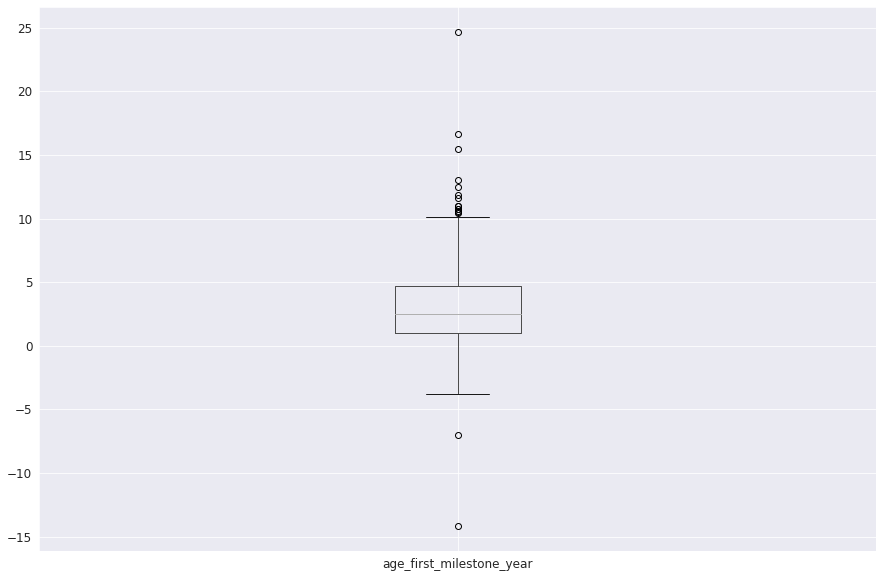

In [ ]:
#outliers show that many companies hit their milestone even before founding
start_up.boxplot(column="age_first_milestone_year", fontsize="large");

In [ ]:
#fill the missing milestone ages with 0
start_up['age_first_milestone_year'].fillna(0)
start_up['age_last_milestone_year'].fillna(0)
start_up.head(5)

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry
0,CA,42.358880,-71.056820,c:6669,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,succeed,POINT (-71.05682 42.35888)
1,CA,37.238916,-121.973718,c:16283,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,succeed,POINT (-121.97372 37.23892)
2,CA,32.901049,-117.192656,c:65620,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,succeed,POINT (-117.19266 32.90105)
3,CA,37.320309,-122.050040,c:42668,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,succeed,POINT (-122.05004 37.32031)
4,CA,37.779281,-122.419236,c:65806,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,fail,POINT (-122.41924 37.77928)


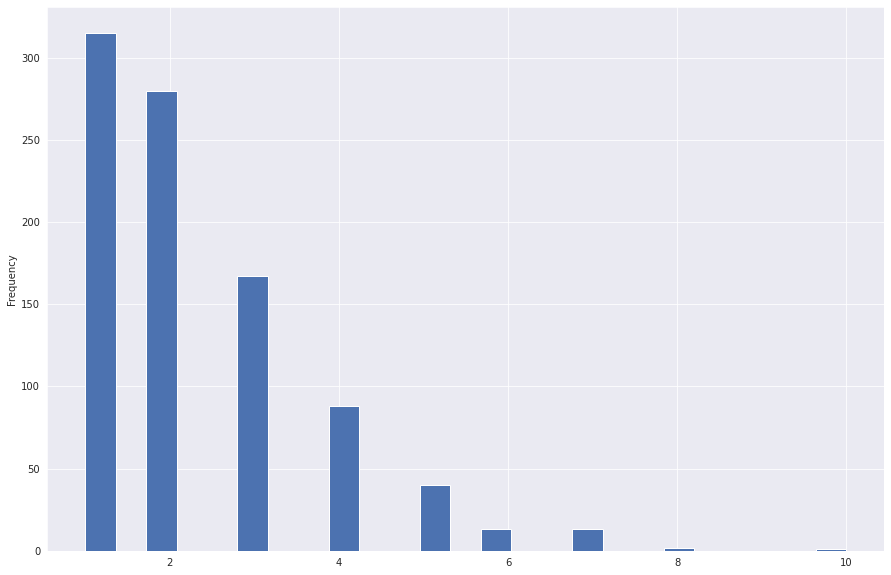

In [ ]:
#most companies had a funding round 0f 0 - 3, and rarely beyond four
start_up.funding_rounds.plot.hist(bins=25,);

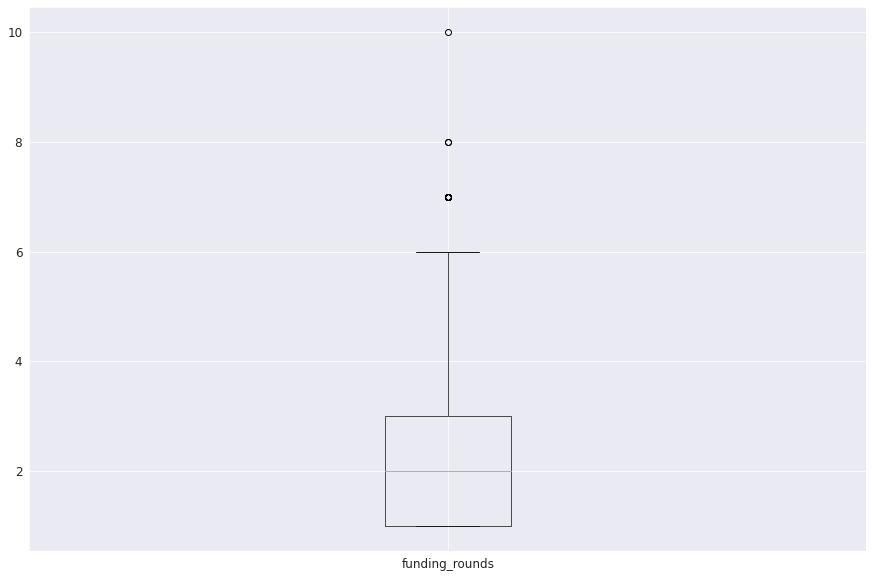

In [ ]:
#there were no outliers
start_up.boxplot(column="funding_rounds", fontsize="large");

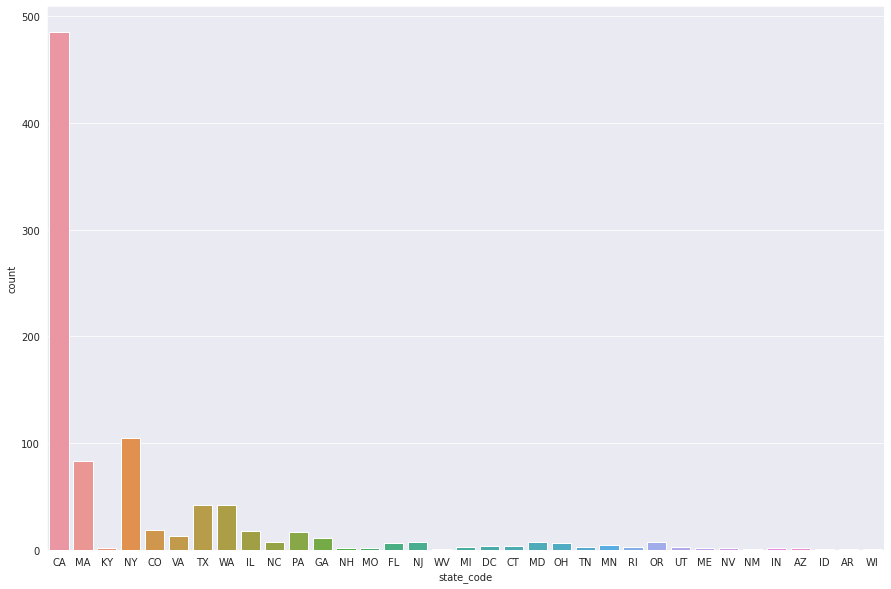

In [ ]:
#after plotting the state codes, california had the highest number of startups in the US
sns.countplot(x="state_code", data=start_up)

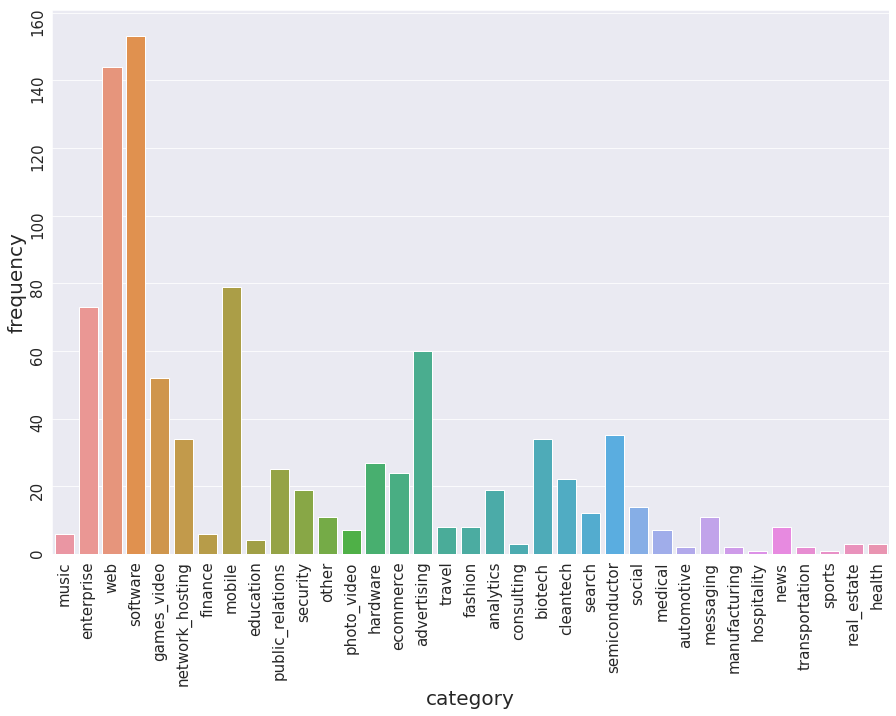

In [ ]:
#The top 5 startup categories in order are software, web, mobile, enterprising, enterprise
sns.countplot(data=start_up, x="category_code")
plt.xlabel(xlabel="category", fontsize=20)
plt.ylabel(ylabel="frequency", fontsize=20)
plt.tick_params(labelsize=15, labelrotation=90)

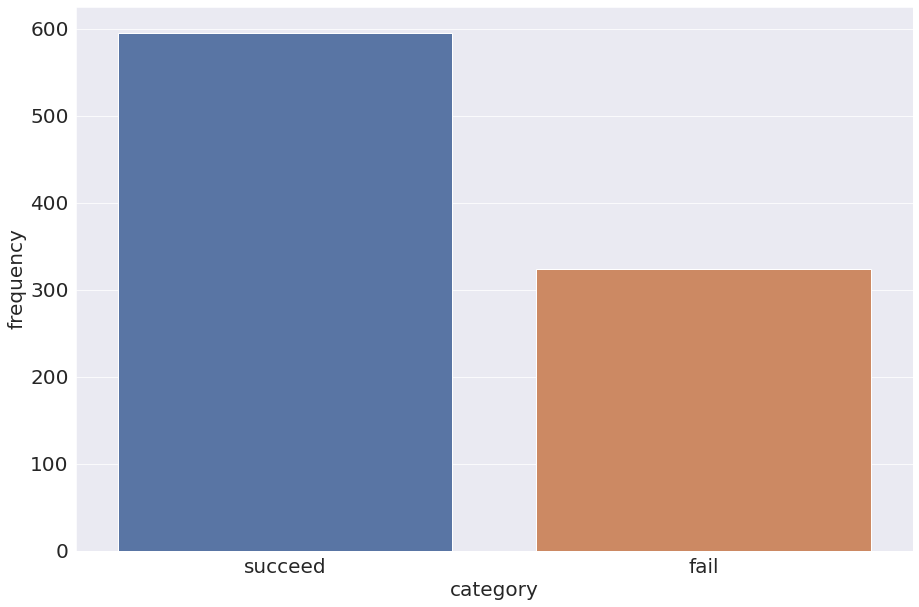

In [ ]:
#there are more acquired startups than closed - also tells us that this a balanced data suitable for analysis
sns.countplot(data=start_up, x="status")
plt.xlabel(xlabel="category", fontsize=20)
plt.ylabel(ylabel="frequency", fontsize=20)
plt.tick_params(labelsize=20);

In [ ]:
#cleaning up (filling) the missing milestone age - this shows that the startups didn't hit any milestone.
start_up["age_first_milestone_year"] = start_up["age_first_milestone_year"].fillna(0)
start_up["age_last_milestone_year"] = start_up["age_last_milestone_year"].fillna(0)

In [ ]:
#start_up['founded_at'] = start_up['founded_at'].apply(lambda a: a.year)
#start_up['closed_at'] = start_up['closed_at'].apply(lambda a: a.year)
#start_up.head(15)
start_up["founded_year"] = pd.DatetimeIndex(start_up["founded_at"]).year
start_up["closed_year"] = pd.DatetimeIndex(start_up["closed_at"]).year
start_up.head(5)



,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,founded_year,closed_year
0,CA,42.358880,-71.056820,c:6669,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,succeed,POINT (-71.05682 42.35888),2007,NaN
1,CA,37.238916,-121.973718,c:16283,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,succeed,POINT (-121.97372 37.23892),2000,NaN
2,CA,32.901049,-117.192656,c:65620,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,succeed,POINT (-117.19266 32.90105),2009,NaN
3,CA,37.320309,-122.050040,c:42668,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,succeed,POINT (-122.05004 37.32031),2002,NaN
4,CA,37.779281,-122.419236,c:65806,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,fail,POINT (-122.41924 37.77928),2010,2012.0


In [ ]:
#having a statistical view of the data for better insight and inference
start_up.describe()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,founded_year,closed_year
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,9.190000e+02,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,332.000000
mean,38.518178,-103.510652,2.251606,3.942489,2.558824,3.977220,7.696409,2.310120,2.543599e+07,1.842220,0.526659,0.114255,0.090316,0.045702,0.221980,0.166485,0.156692,0.085963,0.079434,0.065288,0.056583,0.026115,0.036997,0.003264,0.323177,0.325354,0.254625,0.508161,0.391730,0.231774,0.099021,2.835798,0.809576,2005.479869,2011.436747
std,3.748499,22.396445,2.487201,2.936164,2.934622,3.413238,7.271898,1.390371,1.900438e+08,1.323543,0.499561,0.318293,0.286789,0.208951,0.415804,0.372719,0.363708,0.280462,0.270562,0.247168,0.231170,0.159565,0.188857,0.057073,0.467944,0.468762,0.435887,0.500206,0.488403,0.422195,0.298852,1.866152,0.392850,3.517057,1.596514
min,25.752358,-122.756956,-3.506800,-1.986300,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1984.000000,2001.000000
25%,37.388869,-122.198732,0.576700,1.698600,0.000000,1.000000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,2003.000000,2011.000000
50%,37.779281,-118.356970,1.452100,3.528800,2.000000,3.783600,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,2006.000000,2012.000000
75%,40.730646,-77.214731,3.583550,5.560250,4.002700,6.039750,10.000000,3.000000,2.460527e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,2008.000000,2013.000000
max,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,2013.000000,2013.000000


In [ ]:
#replacing the binary data to YES and NO to aid visualization
start_up["is_top500"].replace(0,"NO", inplace=True)
start_up["is_top500"].replace(1, "YES", inplace=True)


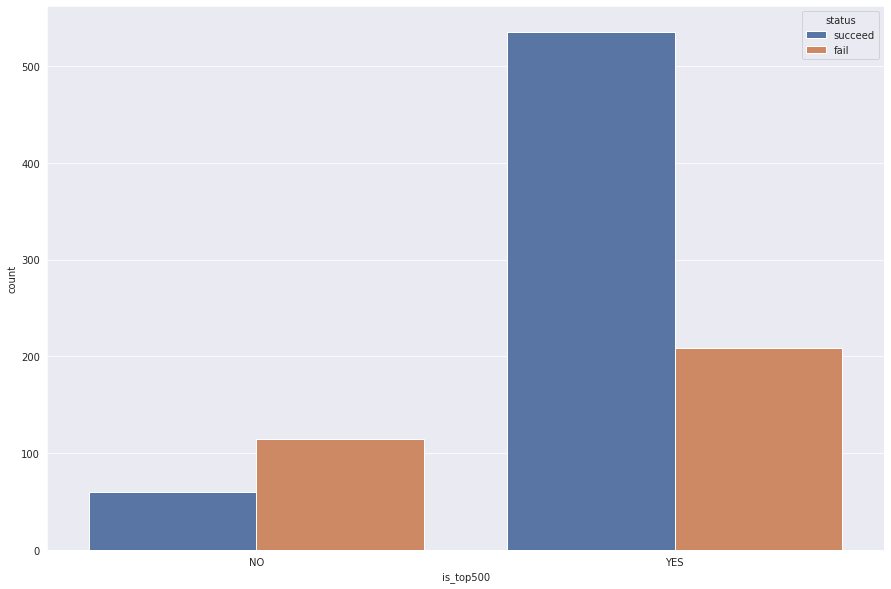

In [ ]:
#this showed us that most companies adjudged as top-500 succeeded
sns.countplot(x = "is_top500", data = start_up, hue = "status")

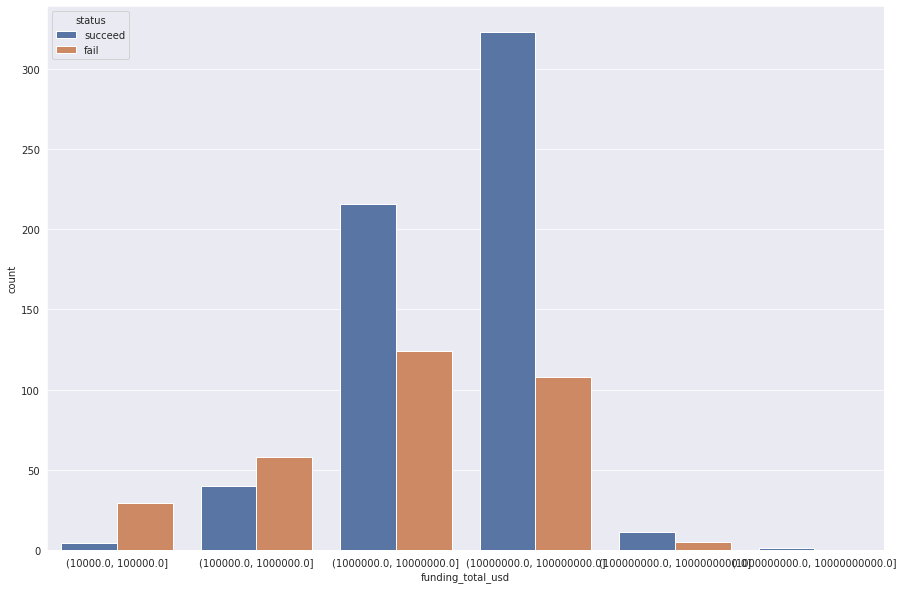

In [ ]:
#shows the correlation - startups with more funding tend to succeed (the log was used for better visualization)
funding_bins = pd.cut(start_up["funding_total_usd"], [1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
sns.countplot(x = funding_bins, data = start_up, hue = "status")

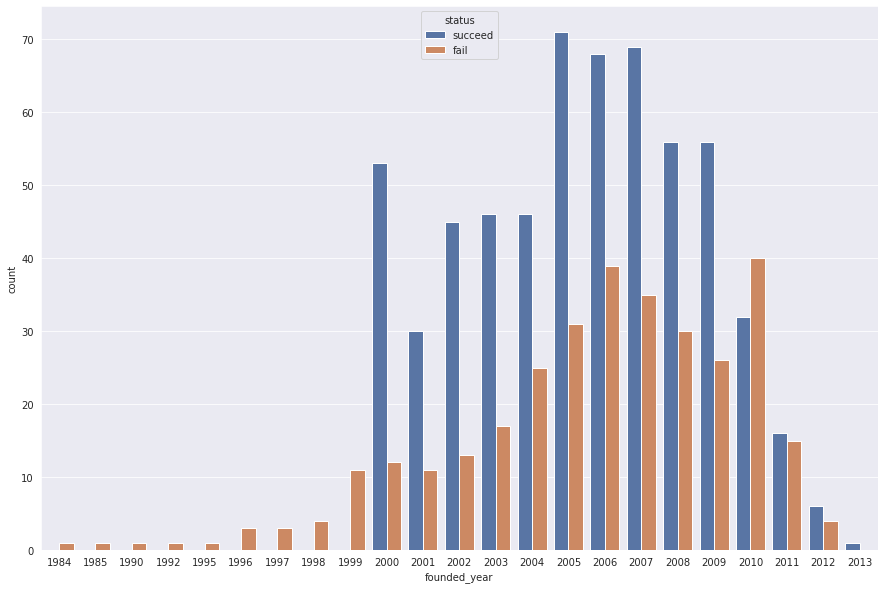

In [ ]:
#2005 - 2007 was a great year for startups, it could be due to some economic boom or an increase in funding, all startups prior to 2000 failed
sns.countplot(x = "founded_year", data = start_up, hue = "status")


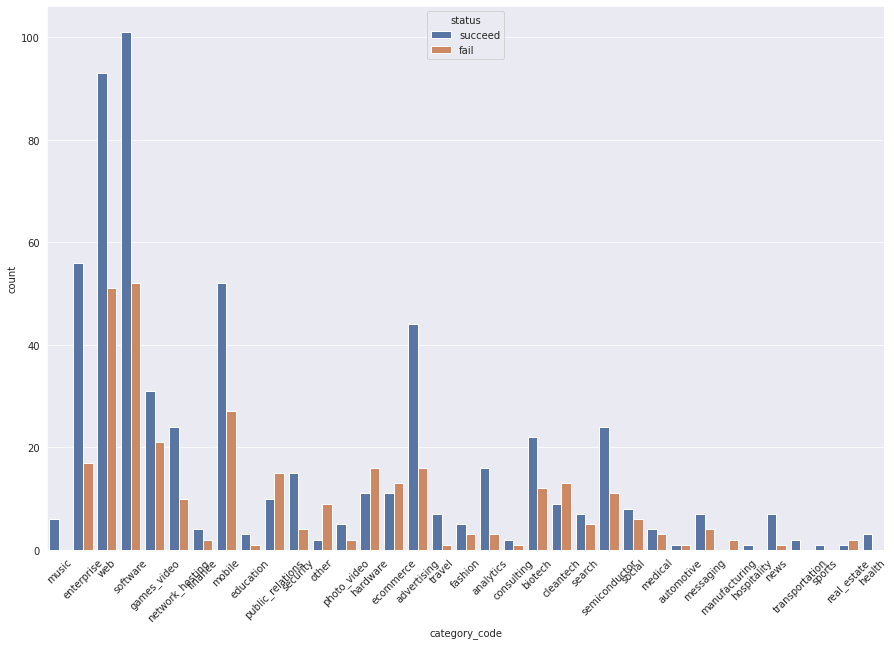

In [ ]:
#shows the rate of success to failure per start=up category
sns.countplot(x = "category_code", data = start_up, hue = "status")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#replacing the binary data to YES and NO to aid visualization
start_up["has_VC"].replace(0,"NO", inplace=True)
start_up["has_VC"].replace(1, "YES", inplace=True)

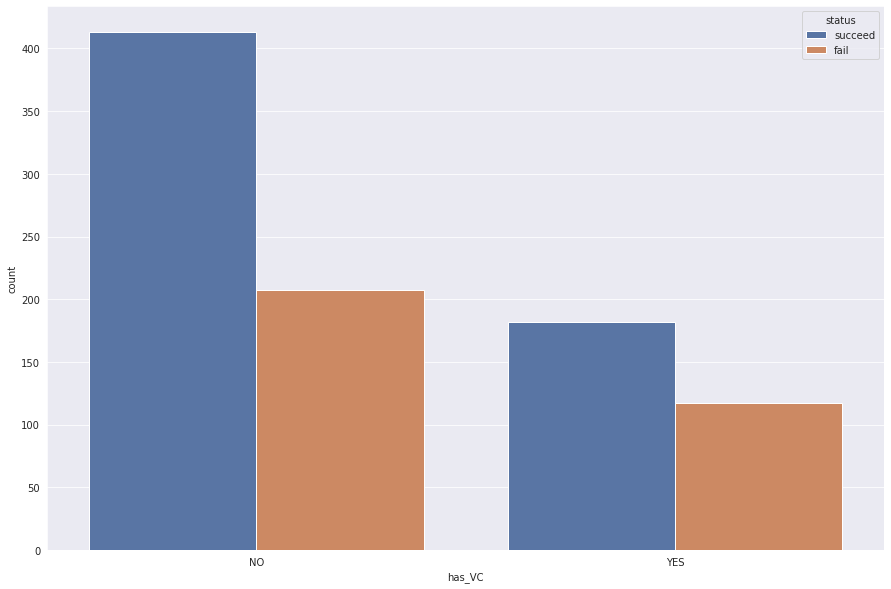

In [ ]:
# Although there were more startups without VC, 1:2 of all start ups without VC Succeeded, ratio is better than those with VC
sns.countplot(x = "has_VC", data = start_up, hue = "status")

In [ ]:
#replacing the binary data to YES and NO to aid visualization
start_up["has_angel"].replace(0,"NO", inplace=True)
start_up["has_angel"].replace(1, "YES", inplace=True)

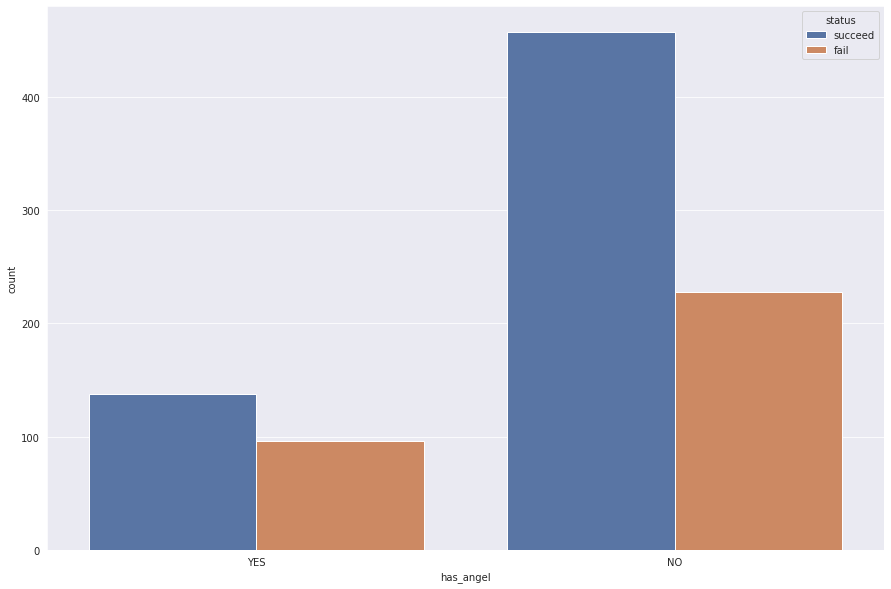

In [ ]:
#same as in vc - a better look shows they were probably vc funded
sns.countplot(x = "has_angel", data = start_up, hue = "status")

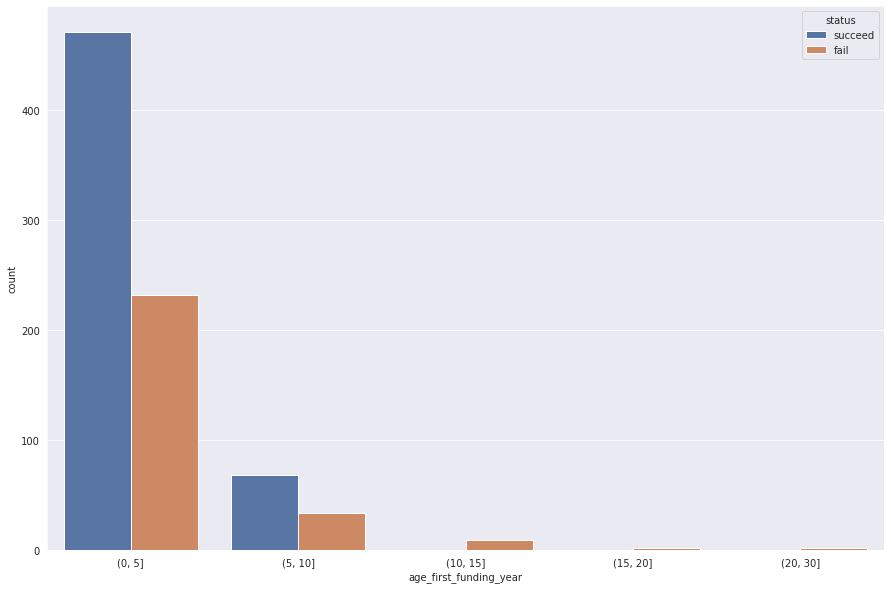

In [ ]:
#more startups were funded in their first five years than other years, also startups funded later than 10 years all closed/failed
age_bins = pd.cut(start_up["age_first_funding_year"], [0,5,10,15,20,30])
sns.countplot(x = age_bins, data = start_up, hue = "status")

In [ ]:
#checking the unique number of milestones
start_up["milestones"].unique()

array([3, 1, 2, 4, 0, 5, 6, 8])

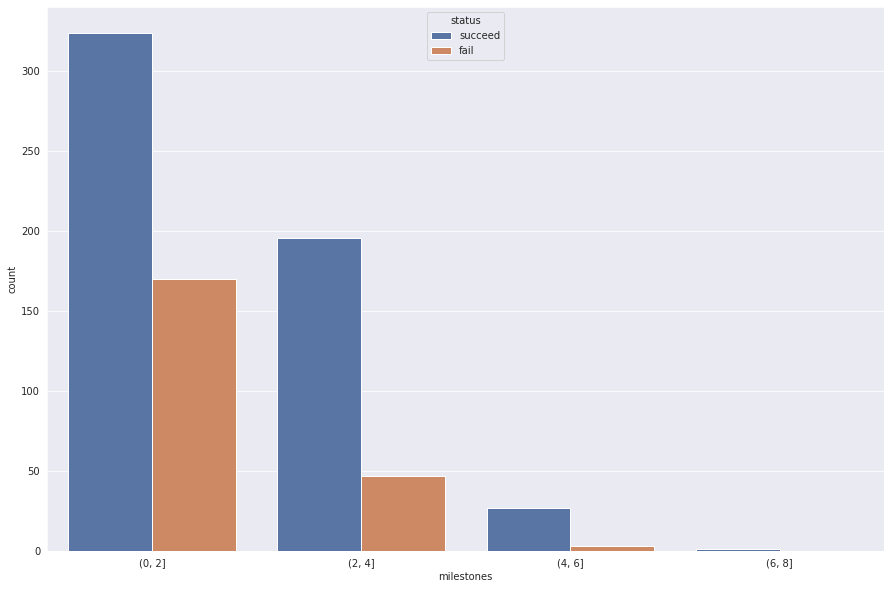

In [ ]:
#the more milestones a startup hit, the less likely of closure
milestone_bins = pd.cut(start_up["milestones"], [0,2,4,6,8])
sns.countplot(x = milestone_bins , data = start_up, hue = "status")


In [ ]:
#viewing the top 5 years that had the most successful startups - 2005 to 2009
start_up_success = start_up[start_up['status'] == 'succeed']
success_by_year = start_up_success.groupby(['founded_year'], as_index=False)['id'].count()
success_by_year.sort_values(['id'], ascending=False, inplace=True)
top_five_years = success_by_year.head(5)
top_five_years.head()


,founded_year,id
5,2005,71
7,2007,69
6,2006,68
8,2008,56
9,2009,56


In [ ]:
#grouping the top 5 years by sector
for years in top_five_years['founded_year']:
  for date in start_up_success:
    successful_startups = start_up_success[(start_up_success['founded_year'] == 2005) |(start_up_success['founded_year'] == 2007) |(start_up_success['founded_year'] == 2005) |(start_up_success['founded_year'] == 2007) |(start_up_success['founded_year'] == 2008) |(start_up_success['founded_year'] == 2006) |(start_up_success['founded_year'] == 2009)  ]

In [ ]:
#checking the category of the successful startups in the top 5 years
startup_category=successful_startups.groupby(['category_code'], as_index=False)['id'].count()
startup_category.sort_values(['id'], ascending=False, inplace=True)
startup_category.head()

,category_code,id
29,web,62
25,software,43
7,enterprise,33
0,advertising,31
15,mobile,25


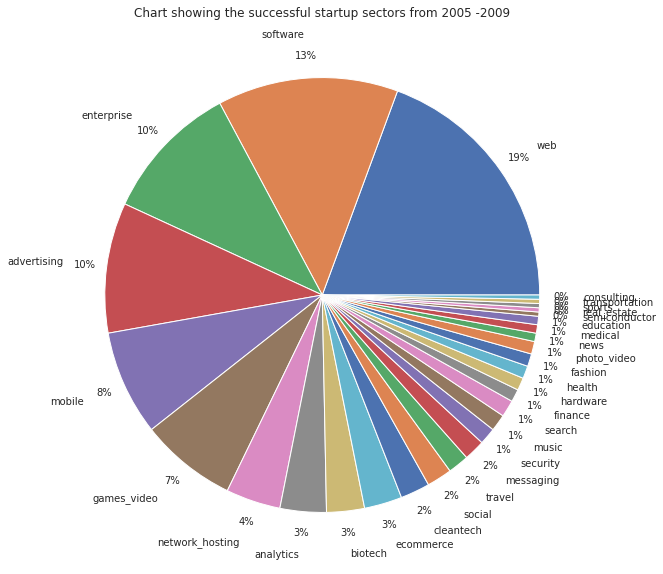

In [ ]:
#visualizing the top 5 sectors for successful startups in the top five years
plt.figure(figsize = (20,10))
plt.pie(startup_category['id'], labels=startup_category['category_code'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Chart showing the successful startup sectors from 2005 -2009')

plt.show()

In [ ]:
closed_startup = start_up[(start_up['status']== 'fail')]
closed_startup['running_age'] = closed_startup['closed_year'] - closed_startup['founded_year']
start_up_running_age = closed_startup.groupby(['running_age'], as_index=True)['id'].count()
    

In [ ]:
for years in closed_startup['running_age']:
    less_than_6 = closed_startup[(closed_startup['running_age']<=5)]['id'].count()
    six_to_ten = closed_startup[(closed_startup['running_age']>5) & (closed_startup['running_age']<=10)]['id'].count()
    ten_to_15 = closed_startup[(closed_startup['running_age']>10) & (closed_startup['running_age']<=15)]['id'].count()
    more_than_15 = closed_startup[(closed_startup['running_age']>15)]['id'].count()

    list_of_years = [less_than_6,six_to_ten,ten_to_15,more_than_15]
    list_of_names = ['0 - 5 yrs', '5 -10 years', '10 - 15 years', '> 15 years']

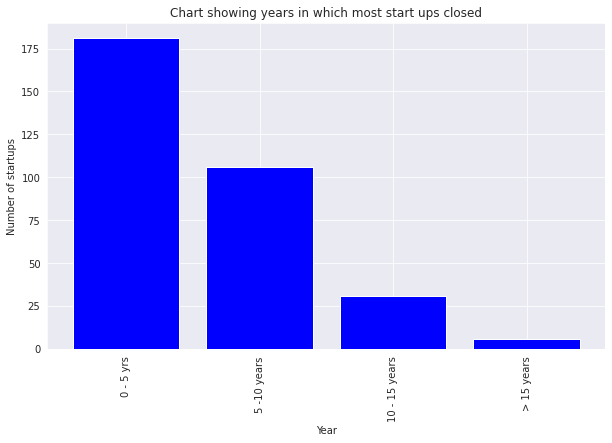

In [ ]:
#shows that
plt.figure(figsize = (10,6))
plt.bar(list_of_names,list_of_years, color='blue')
plt.title('Chart showing years in which most start ups closed')
plt.ylabel('Number of startups')
plt.xlabel('Year')
plt.xticks(rotation=90)
        
plt.show()


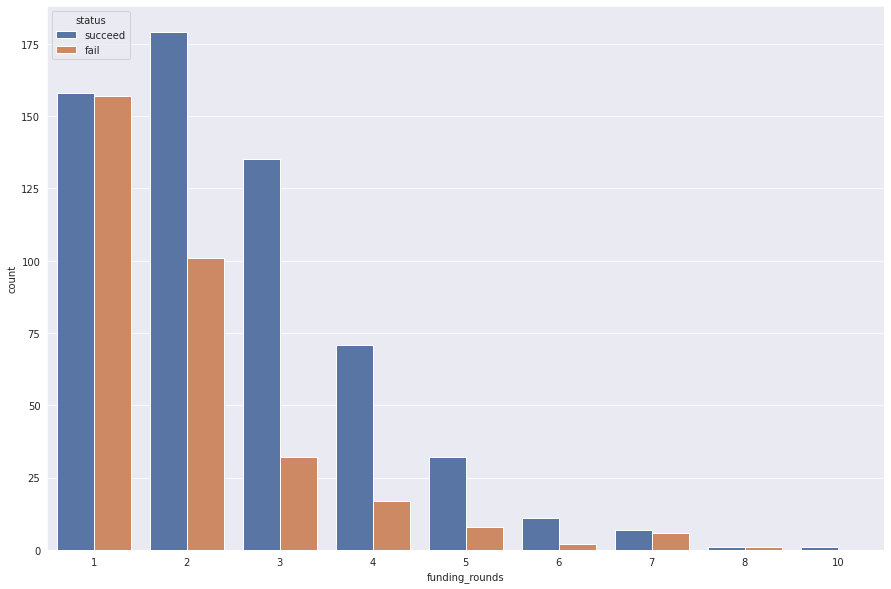

In [ ]:
#the ratio of successful to failure increased with more funding rounds i.e the higher the funding rounds, the greater chance of success
sns.countplot(data=start_up, x="funding_rounds", hue="status")